# Preparing Exported Database and Assets for Tableau Dashboard

In [30]:
# Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
!pip install -U dojo_ds -q
import dojo_ds as ds
ds.__version__

'1.0.9'

## Prepare Banner Image
- Convert to .png

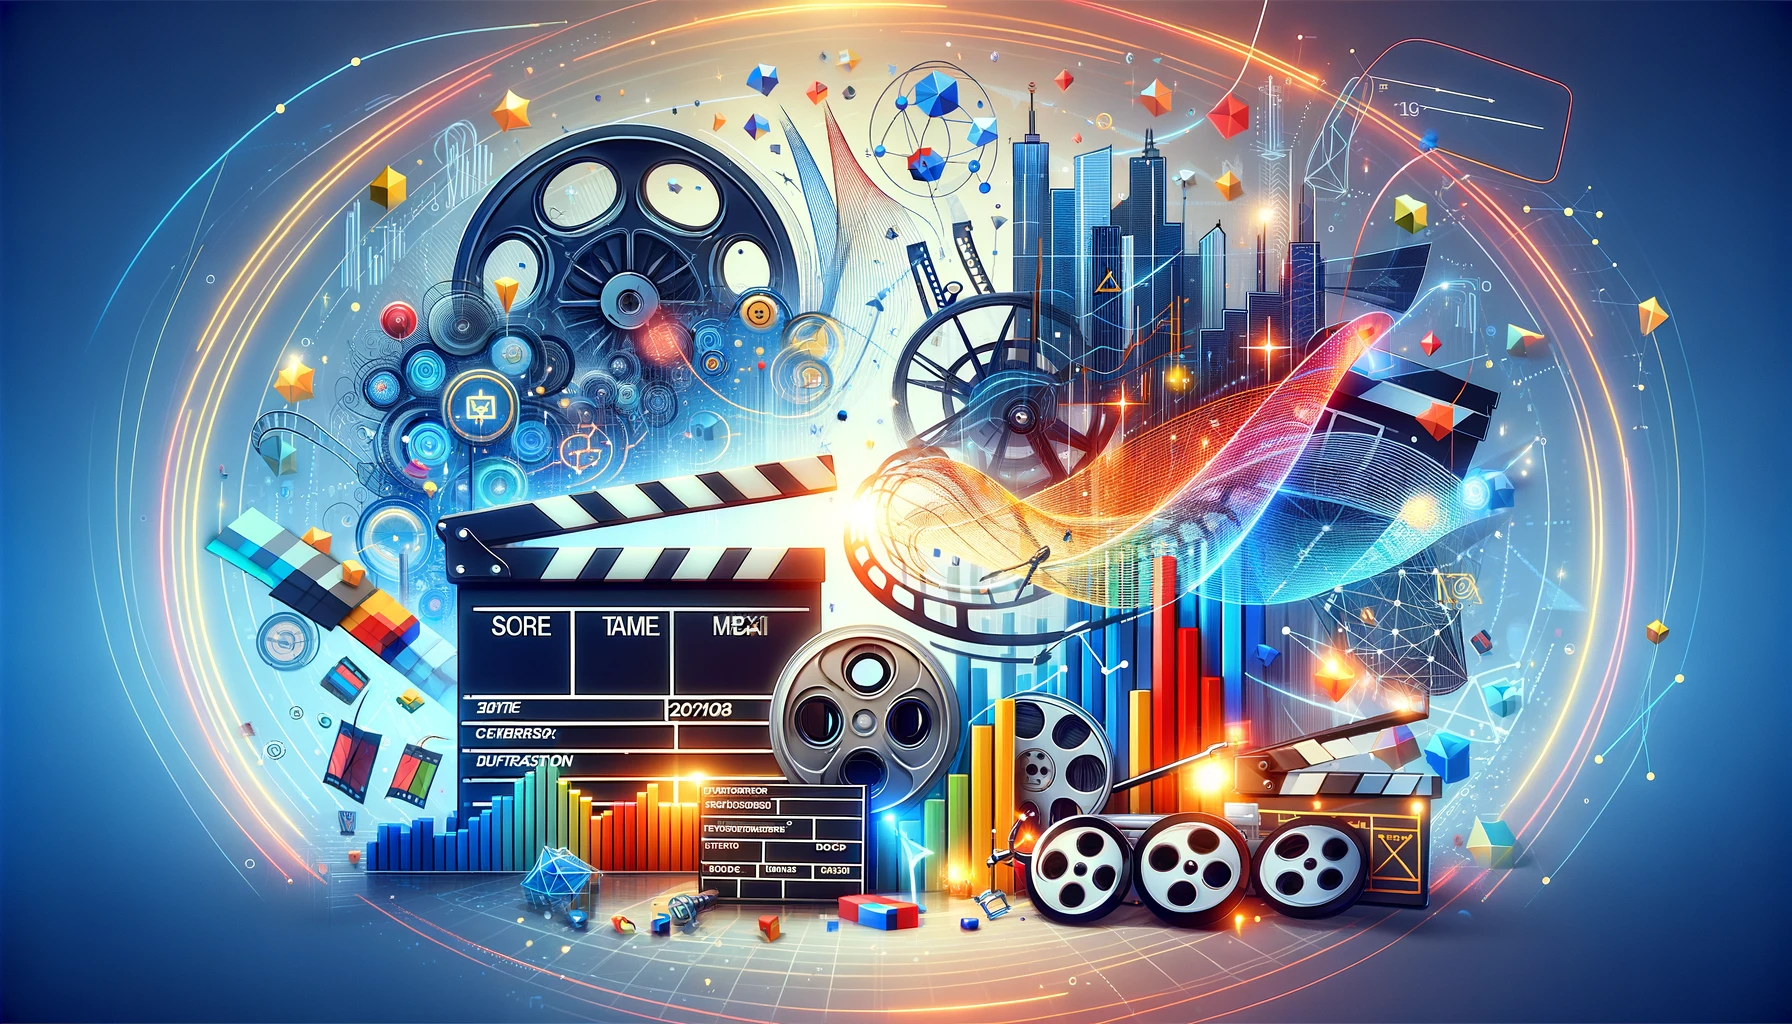

In [3]:
from PIL import Image
import os

fpath_img = "Images/banners/DALL-E-movie-banner_01.webp"
img = Image.open(fpath_img)
img

In [7]:
img.width, img.height

(1792, 1024)

In [16]:
img.width/img.height

1.75

In [18]:
# new_width = 448, 256).

In [19]:
# new_img = img.resize((new_width, new_height), resample=Image.LANCZOS)


In [20]:
# new fname for png
fpath_img_converted = fpath_img.replace(".webp",'.png')
fpath_img_converted

'Images/banners/DALL-E-movie-banner_01.png'

In [21]:
img.save(fpath_img_converted)

## New Workflow (MySQL-Based)

In [32]:
# raise Exception("old workflow below here")

## MySQL Version

In [33]:
# !pip install pymysql
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists
from urllib.parse import quote_plus

In [34]:
import json
with open("/Users/codingdojo/.secret/mysql.json") as f:
	login = json.load(f)
	
login.keys()

dict_keys(['user', 'password', 'port', 'host', 'database'])

In [35]:
# ## create a new movies database
# Get the database name from AWS login if not present in login_local
# db_name = login_local.get('database', login['database'])
connect_str = f"mysql+pymysql://{login['user']}:{quote_plus(login['password'])}@{login['host']}/{login['database']}"

## Check if database exists, if not, create it
if database_exists(connect_str) == False:
    raise Exception("Database doesn't exist!")
    # create_database(connect_str)
else:
    ## create engine
    engine = create_engine(connect_str)
    conn = engine.connect()
    print("[i] Successfully connected to database.")

[i] Successfully connected to database.


In [36]:
import pandas as pd

# Get list of table names
q  = """SHOW TABLES;"""
show_tables = pd.read_sql(q, conn)

show_tables

,Tables_in_movies-db
0,collections
1,genres
2,name_basics
3,name_characters
4,name_knownForTitles
5,name_professions
6,production_companies
7,reviews
8,title_basics
9,title_collection


In [37]:
import os
folder = "Data-For-Tableau/mysql/"
os.makedirs(folder, exist_ok=True)

In [44]:
# DATA = {}
# Get values for table names as 1d list
table_names = show_tables.values.flatten()

# new_files = []
for table in table_names:
    
    # Query the database for all rows from table
    temp = pd.read_sql(f"SELECT * FROM {table}", conn)
    
    # Set the filename based on the 
    fname = folder+f"{table}.csv"
    temp.to_csv(fname, index=False)
    
    # DATA[table] = pd.read_csv(fname)

In [41]:
import glob 
q = folder+"*.csv"
file_list = sorted(glob.glob(q))
file_list

['Data-For-Tableau/mysql/collections_mysql.csv',
 'Data-For-Tableau/mysql/genres_mysql.csv',
 'Data-For-Tableau/mysql/name_basics_mysql.csv',
 'Data-For-Tableau/mysql/name_characters_mysql.csv',
 'Data-For-Tableau/mysql/name_knownForTitles_mysql.csv',
 'Data-For-Tableau/mysql/name_professions_mysql.csv',
 'Data-For-Tableau/mysql/production_companies_mysql.csv',
 'Data-For-Tableau/mysql/reviews_mysql.csv',
 'Data-For-Tableau/mysql/title_basics_mysql.csv',
 'Data-For-Tableau/mysql/title_collection_mysql.csv',
 'Data-For-Tableau/mysql/title_crew_mysql.csv',
 'Data-For-Tableau/mysql/title_genres_mysql.csv',
 'Data-For-Tableau/mysql/title_principals_mysql.csv',
 'Data-For-Tableau/mysql/title_production_company_mysql.csv',
 'Data-For-Tableau/mysql/title_ratings_mysql.csv',
 'Data-For-Tableau/mysql/tmdb_mysql.csv']

In [42]:
DATA = {}
for file in file_list:
    fname_ext = os.path.basename(file)
    fname, ext = os.path.splitext(fname_ext)
    temp = pd.read_csv(file)
    DATA[fname] = temp.copy()
    

In [43]:
DATA.keys()

dict_keys(['collections_mysql', 'genres_mysql', 'name_basics_mysql', 'name_characters_mysql', 'name_knownForTitles_mysql', 'name_professions_mysql', 'production_companies_mysql', 'reviews_mysql', 'title_basics_mysql', 'title_collection_mysql', 'title_crew_mysql', 'title_genres_mysql', 'title_principals_mysql', 'title_production_company_mysql', 'title_ratings_mysql', 'tmdb_mysql'])

In [21]:
DATA['production_companies'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39872 entries, 0 to 39871
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    39872 non-null  int64 
 1   company_name  39872 non-null  object
dtypes: int64(1), object(1)
memory usage: 623.1+ KB


In [22]:
DATA['title_production_company'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106553 entries, 0 to 106552
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   imdb_id     106553 non-null  object
 1   company_id  106553 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [23]:
# table_names = tables['Tables_in_movies-viz'].to_list()

# new_files = []
# for table in table_names:
# 	temp = pd.read_sql(f"SELECT * FROM {table}", engine )
	
# 	fname = folder+f"{table}_mysql.csv"
# 	temp.to_csv(fname,index=False)
# 	new_files.append(fname)

In [24]:
new_files

['Data/For Tableau/mysql/collections_mysql.csv',
 'Data/For Tableau/mysql/genres_mysql.csv',
 'Data/For Tableau/mysql/production_companies_mysql.csv',
 'Data/For Tableau/mysql/title_basics_mysql.csv',
 'Data/For Tableau/mysql/title_collection_mysql.csv',
 'Data/For Tableau/mysql/title_genres_mysql.csv',
 'Data/For Tableau/mysql/title_production_company_mysql.csv',
 'Data/For Tableau/mysql/title_ratings_mysql.csv',
 'Data/For Tableau/mysql/tmdb_mysql.csv']

In [25]:
# title_genres = pd.read_csv("Data/For Tableau/title_genres_mysql.csv")
# title_genres.isna().sum() / len(title_genres)

In [26]:
for file in new_files:
    temp_df = pd.read_csv(file)
    print(file)
    display(temp_df.head(), temp_df.tail())

Data/For Tableau/mysql/collections_mysql.csv


,collection_id,collection_name
0,0,#TemanTapiMenikah
1,1,... Cameras Collection
2,2,.hack Collection
3,3,10 giorni... - Collezione
4,4,100 Girls Collection


,collection_id,collection_name
1938,1938,달마야 시리즈
1939,1939,독전 시리즈
1940,1940,동갑내기 과외하기 시리즈
1941,1941,반드시 크게 들을 것
1942,1942,식객 시리즈


Data/For Tableau/mysql/genres_mysql.csv


,Genre_Name,Genre_ID
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4


,Genre_Name,Genre_ID
22,Sport,22
23,Talk-Show,23
24,Thriller,24
25,War,25
26,Western,26


Data/For Tableau/mysql/production_companies_mysql.csv


,company_id,company_name
0,0,# Andrea Sperling Productions
1,1,#Beardforce Films
2,2,#Sinning Works
3,3,#littlesecretfilm
4,4,(주)라인필름


,company_id,company_name
39867,39867,타임스토리그룹
39868,39868,파파스필름
39869,39869,플랫폼픽쳐스
39870,39870,한맥문화
39871,39871,환타지엔터테인먼트


Data/For Tableau/mysql/title_basics_mysql.csv


,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0035423,Kate & Leopold,2001.0,118
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70
2,tt0067683,Workers '71: Nothing About Us Without Us,2006.0,47
3,tt0069049,The Other Side of the Wind,2018.0,122
4,tt0088751,The Naked Monster,2005.0,100


,tconst,primaryTitle,startYear,runtimeMinutes
116399,tt9915436,Vida em Movimento,2019.0,70
116400,tt9915872,The Last White Witch,2019.0,97
116401,tt9916170,The Rehearsal,2019.0,51
116402,tt9916190,Safeguard,2020.0,95
116403,tt9916362,Coven,2020.0,92


Data/For Tableau/mysql/title_collection_mysql.csv


,imdb_id,collection_id
0,tt0317219,274
1,tt0317919,963
2,tt0344854,131
3,tt0348150,1389
4,tt0362120,1256


,imdb_id,collection_id
3912,tt1133935,391
3913,tt2243192,1778
3914,tt3533690,1187
3915,tt3679304,1773
3916,tt6352612,1142


Data/For Tableau/mysql/title_genres_mysql.csv


,tconst,Genre_ID
0,tt0035423,5
1,tt0035423,10
2,tt0035423,19
3,tt0062336,8
4,tt0067683,7


,tconst,Genre_ID
207418,tt9916190,0
207419,tt9916190,2
207420,tt9916190,24
207421,tt9916362,8
207422,tt9916362,12


Data/For Tableau/mysql/title_production_company_mysql.csv


,imdb_id,company_id
0,tt0204250,14402
1,tt0206634,36827
2,tt0206634,33356
3,tt0206634,16040
4,tt0244521,11845


,imdb_id,company_id
106548,tt7098636,6068
106549,tt7098636,26073
106550,tt7098636,2167
106551,tt7637550,961
106552,tt9641790,20583


Data/For Tableau/mysql/title_ratings_mysql.csv


,tconst,averageRating,numVotes
0,tt0035423,6.4,85245
1,tt0062336,6.4,163
2,tt0067683,6.4,90
3,tt0069049,6.7,7435
4,tt0088751,5.2,327


,tconst,averageRating,numVotes
87812,tt9915436,7.4,5
87813,tt9915872,7.7,8
87814,tt9916170,7.0,7
87815,tt9916190,3.7,238
87816,tt9916362,6.4,4998


Data/For Tableau/mysql/tmdb_mysql.csv


,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
0,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112
1,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3
2,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155
3,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5
4,tt0093119,7500000.0,0.0,NaN,en,2020-02-17,9.226,4.4,14


,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
78392,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2
78393,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6
78394,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0
78395,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2
78396,tt9916362,0.0,0.0,NR,eu,2020-10-02,7.821,6.8,219


In [46]:
import webbrowser
url = "https://public.tableau.com/views/MovieDashboard_17068360838980/Home?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link"
webbrowser.open(url)

True

# APPENDIX

In [ ]:
raise Exception('old code')

### COPY TO FORMER TABLEAU REPO

In [27]:
new_files

['Data/For Tableau/mysql/collections_mysql.csv',
 'Data/For Tableau/mysql/genres_mysql.csv',
 'Data/For Tableau/mysql/production_companies_mysql.csv',
 'Data/For Tableau/mysql/title_basics_mysql.csv',
 'Data/For Tableau/mysql/title_collection_mysql.csv',
 'Data/For Tableau/mysql/title_genres_mysql.csv',
 'Data/For Tableau/mysql/title_production_company_mysql.csv',
 'Data/For Tableau/mysql/title_ratings_mysql.csv',
 'Data/For Tableau/mysql/tmdb_mysql.csv']

In [28]:
# import os,shutil
# out_folder ="/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-tableau/Data/Movies/mysql/"
# os.makedirs(out_folder,exist_ok=True)

In [29]:
for file in new_files:
    basename = os.path.basename(file)
    shutil.copy2(file,out_folder+basename)

In [30]:
# os.listdir()

### Saving a Final Cleaner Versin

- Rename imdb_id to tconst for easier joins
- Fix certification values

In [31]:
new_files[0]

'Data/For Tableau/mysql/collections_mysql.csv'

In [32]:
out_folder = 'Data/For Tableau/mysql-tconst/'
os.makedirs(out_folder,exist_ok=True)

In [33]:
for file in new_files:
    temp_df = pd.read_csv(file)
    temp_df = temp_df.rename({'imdb_id':'tconst'},axis=1)
    if "certification" in temp_df.columns:
        ## Checking Certification values
        # df['certification'].value_counts(dropna=False)

        # fix extra space certs
        temp_df['certification'] = temp_df['certification'].str.strip()

        ## fix certification col
        repl_cert = {'UR':'NR',
                     'Not Rated':'NR',
                     'Unrated':'NR',
                     '-':'NR',
                     '10':np.nan,
                     'ScreamFest Horror Film Festival':'NR'}
        temp_df['certification'] = temp_df['certification'].replace(repl_cert)    
    
    out_fname = out_folder+os.path.basename(file)
    print(out_fname)
    display(temp_df.head(), temp_df.tail())
    temp_df.to_csv(out_fname,index=False)

Data/For Tableau/mysql-tconst/collections_mysql.csv


,collection_id,collection_name
0,0,#TemanTapiMenikah
1,1,... Cameras Collection
2,2,.hack Collection
3,3,10 giorni... - Collezione
4,4,100 Girls Collection


,collection_id,collection_name
1938,1938,달마야 시리즈
1939,1939,독전 시리즈
1940,1940,동갑내기 과외하기 시리즈
1941,1941,반드시 크게 들을 것
1942,1942,식객 시리즈


Data/For Tableau/mysql-tconst/genres_mysql.csv


,Genre_Name,Genre_ID
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4


,Genre_Name,Genre_ID
22,Sport,22
23,Talk-Show,23
24,Thriller,24
25,War,25
26,Western,26


Data/For Tableau/mysql-tconst/production_companies_mysql.csv


,company_id,company_name
0,0,# Andrea Sperling Productions
1,1,#Beardforce Films
2,2,#Sinning Works
3,3,#littlesecretfilm
4,4,(주)라인필름


,company_id,company_name
39867,39867,타임스토리그룹
39868,39868,파파스필름
39869,39869,플랫폼픽쳐스
39870,39870,한맥문화
39871,39871,환타지엔터테인먼트


Data/For Tableau/mysql-tconst/title_basics_mysql.csv


,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0035423,Kate & Leopold,2001.0,118
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70
2,tt0067683,Workers '71: Nothing About Us Without Us,2006.0,47
3,tt0069049,The Other Side of the Wind,2018.0,122
4,tt0088751,The Naked Monster,2005.0,100


,tconst,primaryTitle,startYear,runtimeMinutes
116399,tt9915436,Vida em Movimento,2019.0,70
116400,tt9915872,The Last White Witch,2019.0,97
116401,tt9916170,The Rehearsal,2019.0,51
116402,tt9916190,Safeguard,2020.0,95
116403,tt9916362,Coven,2020.0,92


Data/For Tableau/mysql-tconst/title_collection_mysql.csv


,tconst,collection_id
0,tt0317219,274
1,tt0317919,963
2,tt0344854,131
3,tt0348150,1389
4,tt0362120,1256


,tconst,collection_id
3912,tt1133935,391
3913,tt2243192,1778
3914,tt3533690,1187
3915,tt3679304,1773
3916,tt6352612,1142


Data/For Tableau/mysql-tconst/title_genres_mysql.csv


,tconst,Genre_ID
0,tt0035423,5
1,tt0035423,10
2,tt0035423,19
3,tt0062336,8
4,tt0067683,7


,tconst,Genre_ID
207418,tt9916190,0
207419,tt9916190,2
207420,tt9916190,24
207421,tt9916362,8
207422,tt9916362,12


Data/For Tableau/mysql-tconst/title_production_company_mysql.csv


,tconst,company_id
0,tt0204250,14402
1,tt0206634,36827
2,tt0206634,33356
3,tt0206634,16040
4,tt0244521,11845


,tconst,company_id
106548,tt7098636,6068
106549,tt7098636,26073
106550,tt7098636,2167
106551,tt7637550,961
106552,tt9641790,20583


Data/For Tableau/mysql-tconst/title_ratings_mysql.csv


,tconst,averageRating,numVotes
0,tt0035423,6.4,85245
1,tt0062336,6.4,163
2,tt0067683,6.4,90
3,tt0069049,6.7,7435
4,tt0088751,5.2,327


,tconst,averageRating,numVotes
87812,tt9915436,7.4,5
87813,tt9915872,7.7,8
87814,tt9916170,7.0,7
87815,tt9916190,3.7,238
87816,tt9916362,6.4,4998


Data/For Tableau/mysql-tconst/tmdb_mysql.csv


,tconst,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
0,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112
1,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3
2,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155
3,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5
4,tt0093119,7500000.0,0.0,NaN,en,2020-02-17,9.226,4.4,14


,tconst,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
78392,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2
78393,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6
78394,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0
78395,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2
78396,tt9916362,0.0,0.0,NR,eu,2020-10-02,7.821,6.8,219


In [34]:
import glob
q = 'Data/For Tableau/mysql-tconst/*.csv*'
found_files  = sorted(glob.glob(q))
found_files

['Data/For Tableau/mysql-tconst/collections_mysql.csv',
 'Data/For Tableau/mysql-tconst/genres_mysql.csv',
 'Data/For Tableau/mysql-tconst/production_companies_mysql.csv',
 'Data/For Tableau/mysql-tconst/title_basics_mysql.csv',
 'Data/For Tableau/mysql-tconst/title_collection_mysql.csv',
 'Data/For Tableau/mysql-tconst/title_genres_mysql.csv',
 'Data/For Tableau/mysql-tconst/title_production_company_mysql.csv',
 'Data/For Tableau/mysql-tconst/title_ratings_mysql.csv',
 'Data/For Tableau/mysql-tconst/tmdb_mysql.csv']

In [45]:
# import os,shutil
# out_folder ="/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-tableau/Data/Movies/mysql-tconst/"
# os.makedirs(out_folder,exist_ok=True)

# for file in found_files:
#     basename = os.path.basename(file)
#     shutil.copy2(file,out_folder+basename)